In [1]:
import numpy as np
import pennylane as qml

[0.61930934-0.13273109j 0.75978977+0.14682614j]
[0.61930934-0.13273109j 0.75978977+0.14682614j]


(<Figure size 1500x400 with 1 Axes>, <Axes: >)

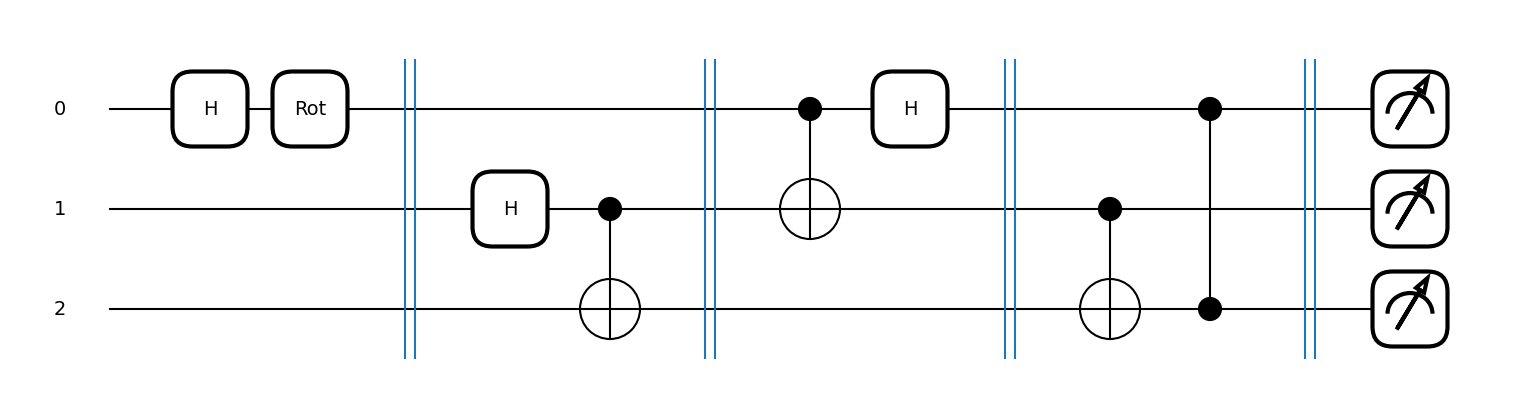

In [2]:
## I.15 Quantum teleportation.

def extract_qubit_state(input_state):
    print (np.array([input_state[0]*2, input_state[1]*2]))
    return np.array([input_state[0]*2, input_state[1]*2])
    
def entangle_qubits():
    qml.Hadamard(1)
    qml.CNOT(wires=[1,2])
    qml.Barrier()

    
def rotate_and_controls():
    # PERFORM THE BASIS ROTATION
    qml.CNOT(wires=[0,1])
    qml.Hadamard(0)
    qml.Barrier()

    # PERFORM THE CONTROLLED OPERATIONS
    qml.CNOT(wires=[1,2])
    qml.CZ(wires=[0,2])
    qml.Barrier()


# Here is the teleportation routine for you
dev = qml.device("default.qubit", wires=3)

def state_preparation():
    qml.Hadamard(wires=0)
    qml.Rot(0.1, 0.2, 0.3, wires=0)
    qml.Barrier()

@qml.qnode(dev)
def teleportation():
    state_preparation()
    entangle_qubits()
    rotate_and_controls()    
    return qml.state()

# Print the extracted state after teleportation
full_state = teleportation()
print(extract_qubit_state(full_state))
qml.draw_mpl(teleportation)()

